# Lead Scoring Case Study

## Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
## Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data sets

df = pd.read_csv("Leads.csv")
pd.set_option('display.max_columns',None)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# checking shape of dataset
df.shape

(9240, 37)

In [5]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
df.describe()  # checking summary of dataset

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# checking missing values

df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
# Dropping columns with more than 40 % null values

df=df[df.columns[df.isnull().mean() <= 0.4]]

In [10]:
df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
df.shape

(9240, 32)

## Univariate analysis

In [12]:
# imbalance of data

df.Converted.value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

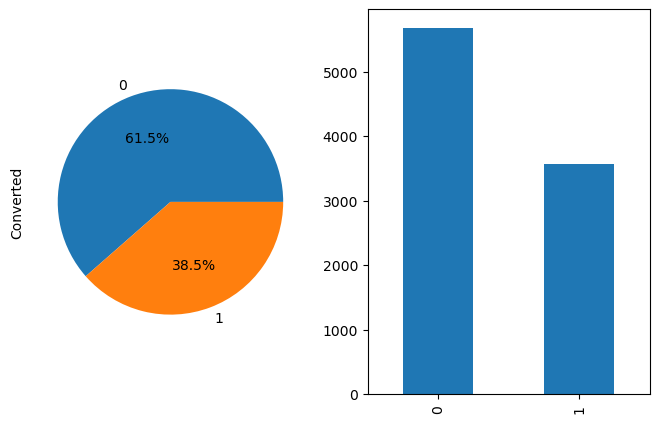

In [13]:
plt.figure(figsize=[8,5])
plt.subplot(1,2,1)
df.Converted.value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
df.Converted.value_counts().plot.bar()
plt.show()

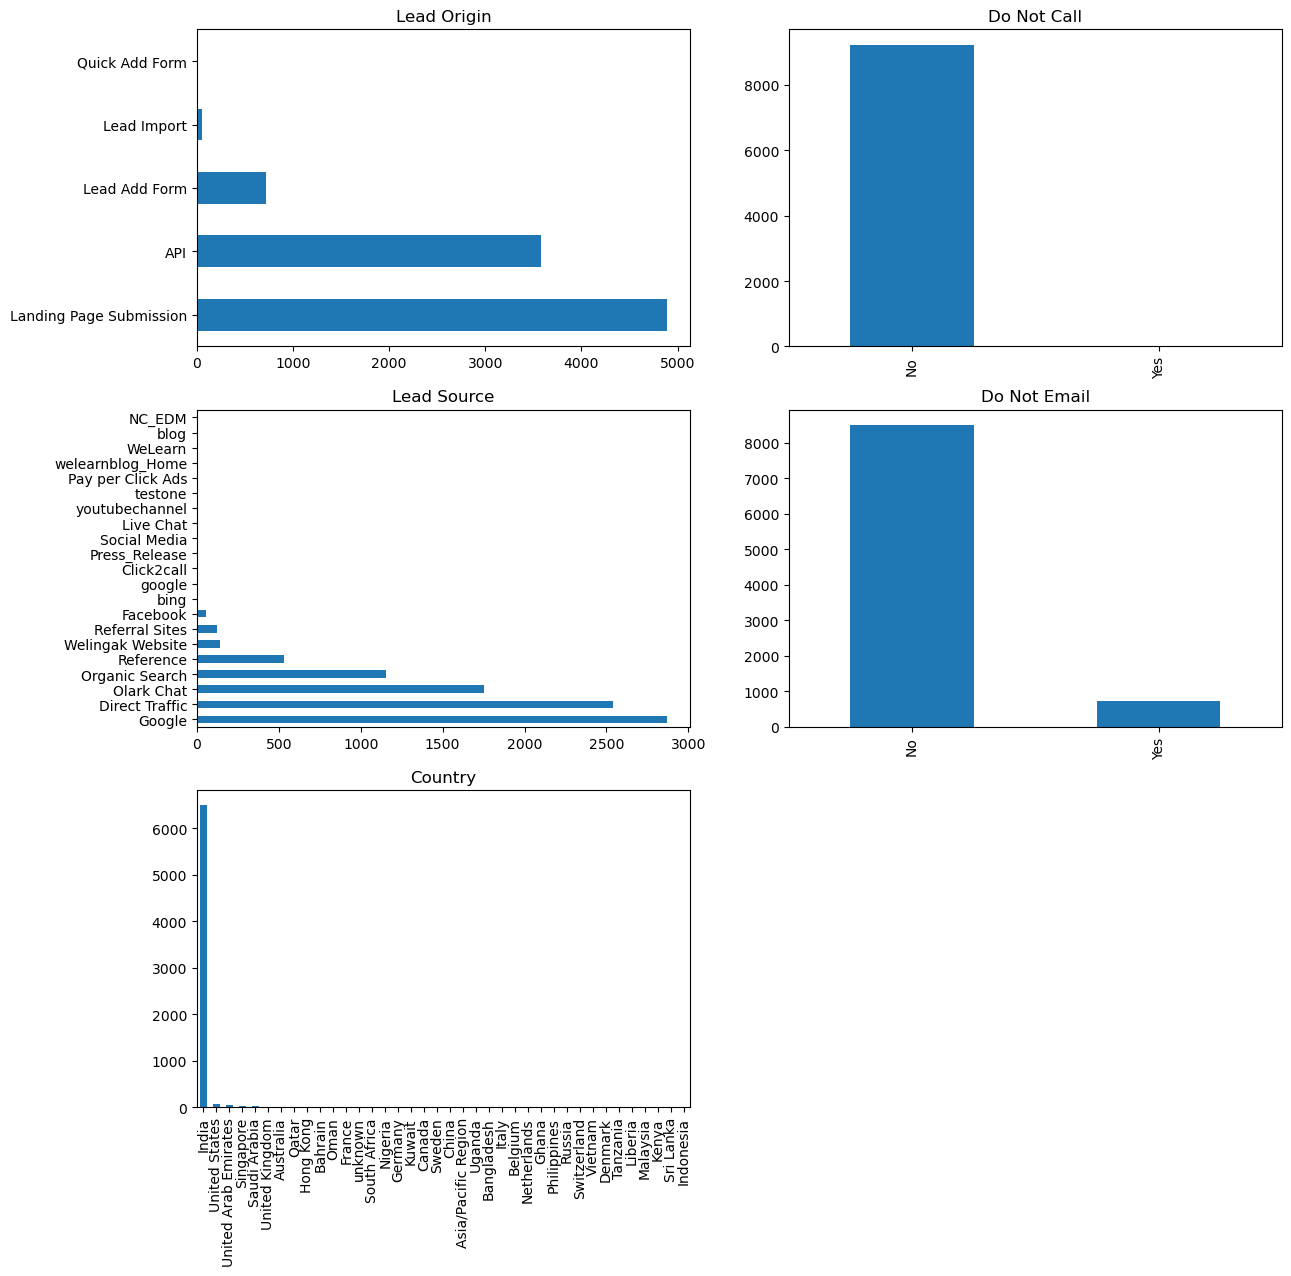

In [14]:
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
plt.title('Lead Origin')
df['Lead Origin'].value_counts().plot.barh()
plt.subplot(3,2,2)
plt.title('Do Not Call')
df['Do Not Call'].value_counts().plot.bar()
plt.subplot(3,2,3)
plt.title('Lead Source')
df['Lead Source'].value_counts().plot.barh()
plt.subplot(3,2,4)
plt.title('Do Not Email')
df['Do Not Email'].value_counts().plot.bar()
plt.subplot(3,2,5)
plt.title('Country')
df['Country'].value_counts().plot.bar()
plt.show()

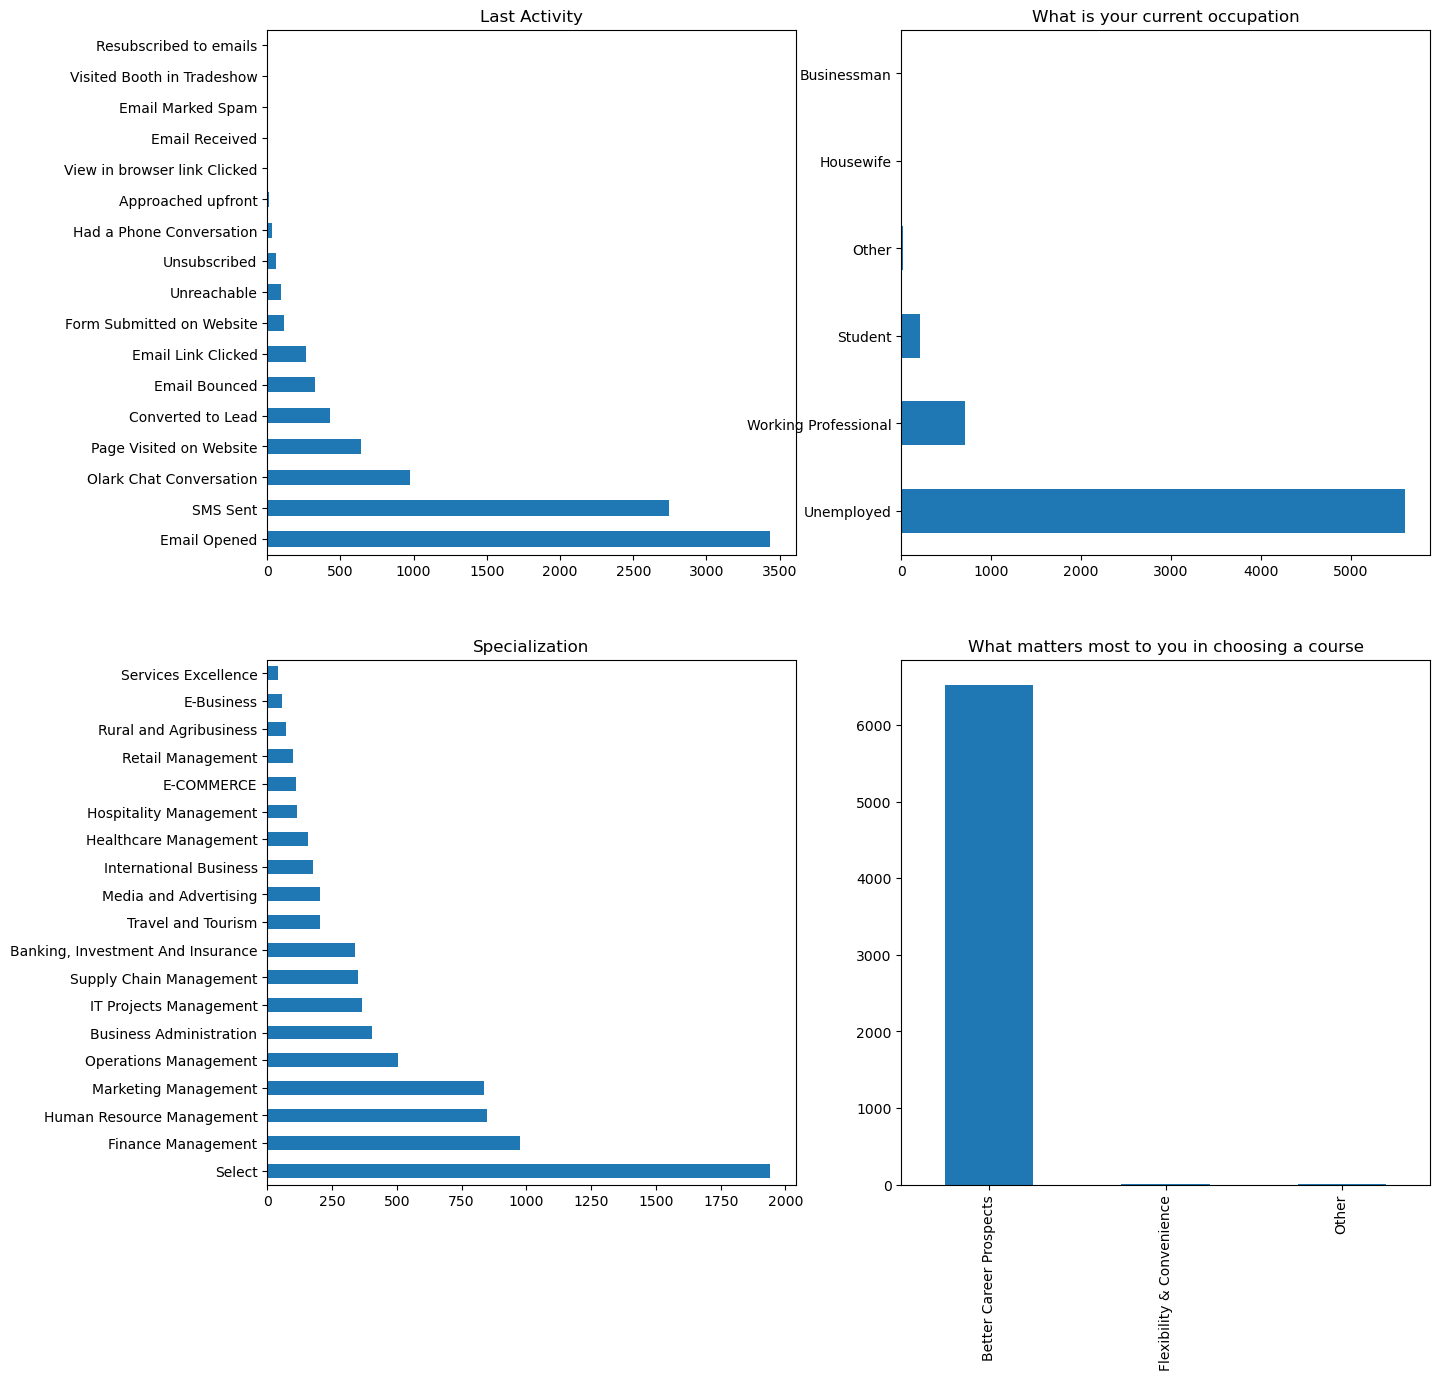

In [15]:
# the column Lead Source, has only few features useful in getting the leads, others dont have any contribution
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('Last Activity')
df['Last Activity'].value_counts().plot.barh()
plt.subplot(2,2,2)
plt.title('What is your current occupation')
df['What is your current occupation'].value_counts().plot.barh()
plt.subplot(2,2,3)
plt.title('Specialization')
df['Specialization'].value_counts().plot.barh()
plt.subplot(2,2,4)
plt.title('What matters most to you in choosing a course')
df['What matters most to you in choosing a course'].value_counts().plot.bar()
plt.show()

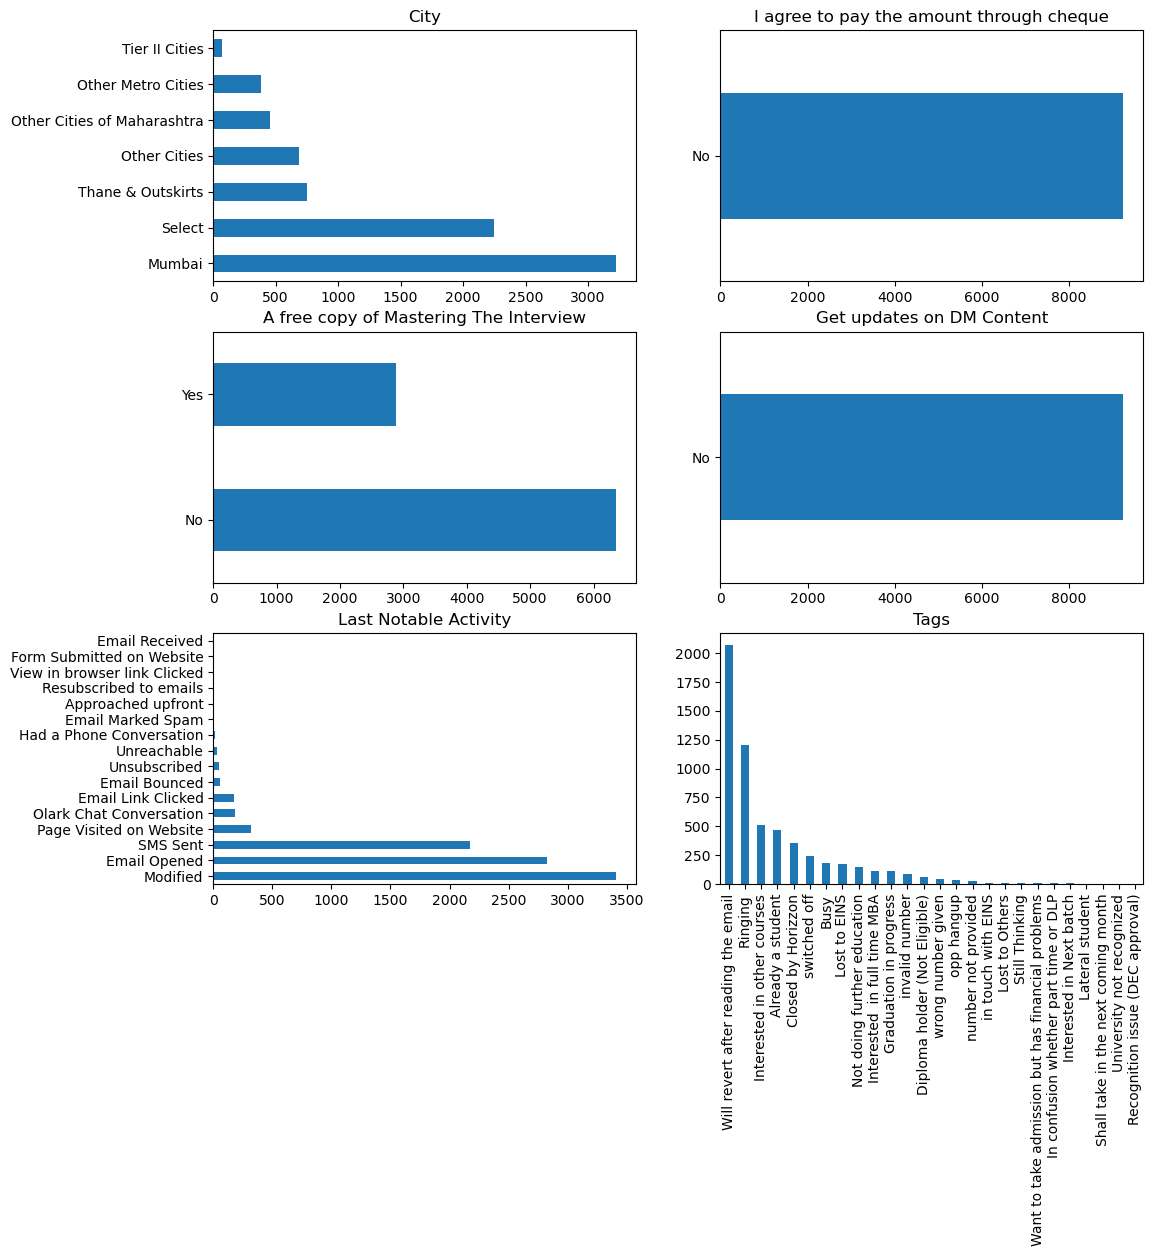

In [16]:
plt.figure(figsize=(12,15))
plt.subplot(4,2,1)
plt.title('City')
df['City'].value_counts().plot.barh()
plt.subplot(4,2,2)
plt.title('I agree to pay the amount through cheque')
df['I agree to pay the amount through cheque'].value_counts().plot.barh()
plt.subplot(4,2,3)
plt.title('A free copy of Mastering The Interview')
df['A free copy of Mastering The Interview'].value_counts().plot.barh()
plt.subplot(4,2,3)
plt.title('A free copy of Mastering The Interview')
df['A free copy of Mastering The Interview'].value_counts().plot.barh()
plt.subplot(4,2,4)
plt.title('Get updates on DM Content')
df['Get updates on DM Content'].value_counts().plot.barh()
plt.subplot(4,2,5)
plt.title('Last Notable Activity')
df['Last Notable Activity'].value_counts().plot.barh()
plt.subplot(4,2,6)
plt.title('Tags')
df['Tags'].value_counts().plot.bar()
plt.show()

## Bivariate analysis 

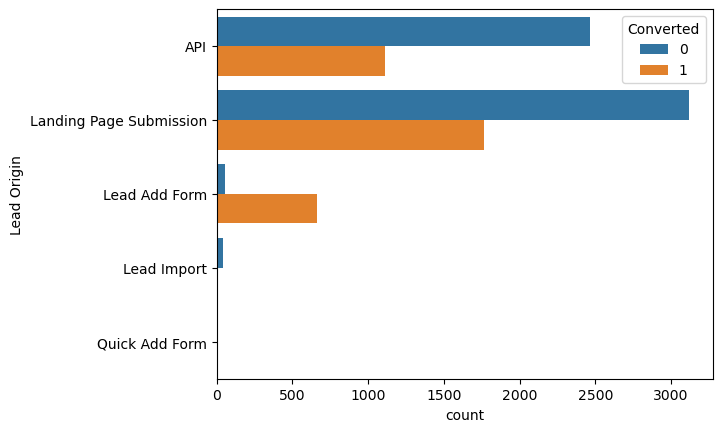

In [17]:
sns.countplot(y=df['Lead Origin'],hue=df.Converted)
plt.show()

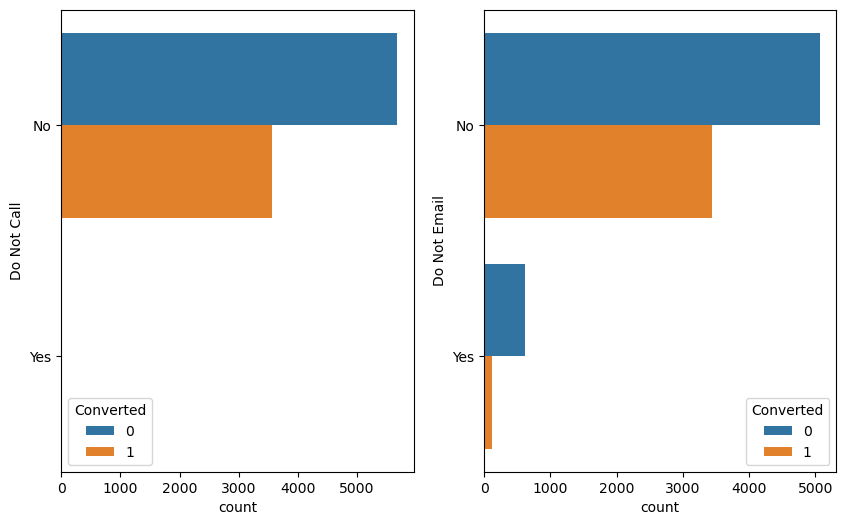

In [18]:
# Out of all the lead sources, Reference, Welingak website, Google, Organic search have good conversion rates
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
sns.countplot(y=df['Do Not Call'],hue=df.Converted)
plt.subplot(1,2,2)
sns.countplot(y=df['Do Not Email'],hue=df.Converted)
plt.show()
plt.show()


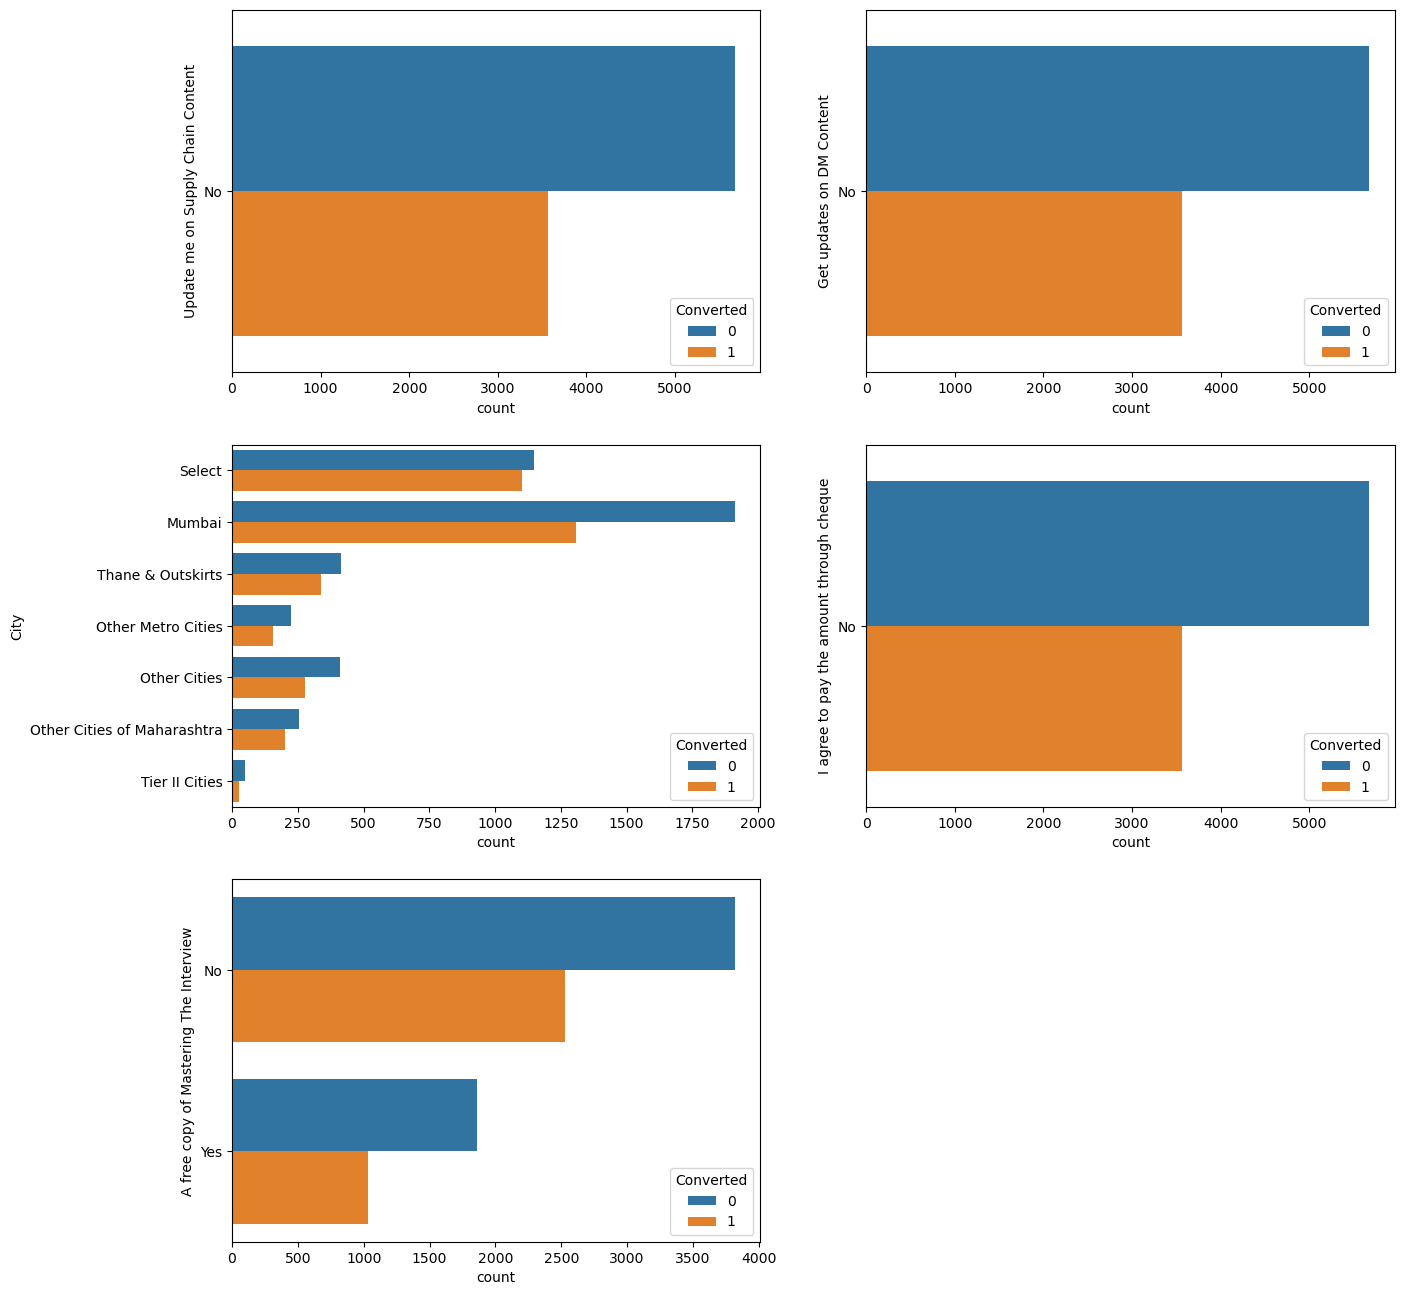

In [19]:
# All the above columns like search, magazine, newspaper article etc have majority class as no, which means these columns are not important and can be dropped 
plt.figure(figsize=[15,16])
#plt.subplot(5,2,1)
#sns.countplot(y=df['Tags'],hue=df.Converted)
plt.subplot(3,2,1)
sns.countplot(y=df['Update me on Supply Chain Content'],hue=df.Converted)
plt.subplot(3,2,2)
sns.countplot(y=df['Get updates on DM Content'],hue=df.Converted)
plt.subplot(3,2,3)
sns.countplot(y=df["City"],hue=df.Converted)
plt.subplot(3,2,4)
sns.countplot(y=df['I agree to pay the amount through cheque'],hue=df.Converted)
plt.subplot(3,2,5)
sns.countplot(y=df['A free copy of Mastering The Interview'],hue=df.Converted)
plt.show()

<Axes: xlabel='Converted', ylabel='TotalVisits'>

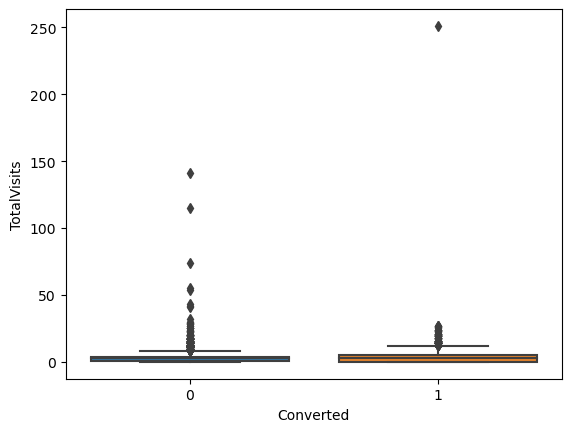

In [20]:
sns.boxplot(x=df.Converted,y=df.TotalVisits)

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

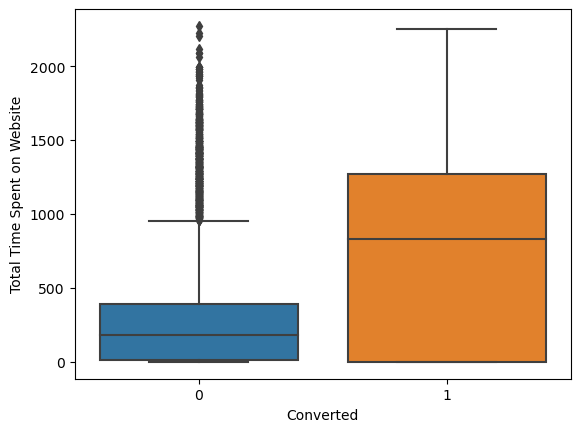

In [21]:
sns.boxplot(x=df.Converted,y=df['Total Time Spent on Website'])


<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

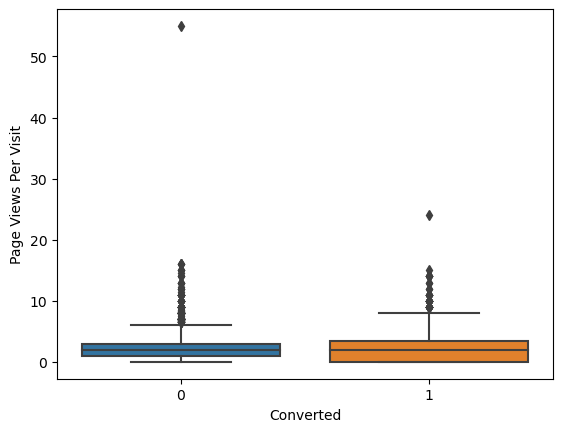

In [22]:
sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])

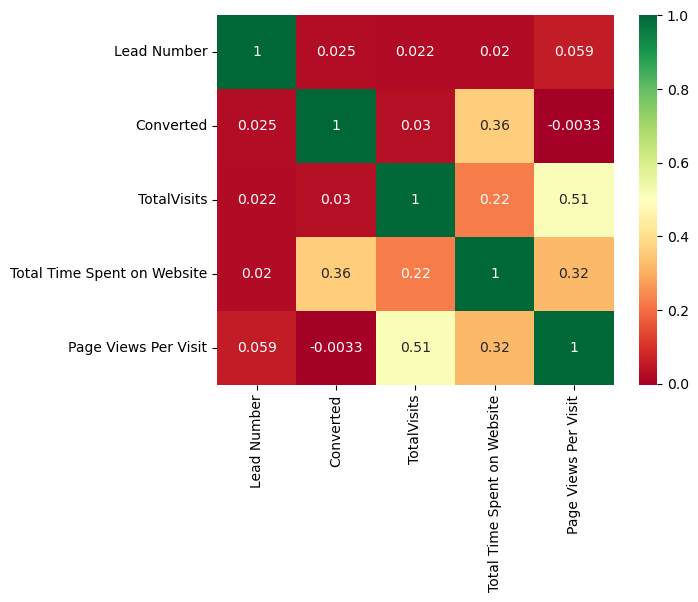

In [23]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

1. No column has avery high correlation with target column

In [24]:
df.shape

(9240, 32)

### Handling Missing Values

In [25]:
# Based on the EDA we can drop following columns:

df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'],axis=1,inplace=True)

In [26]:
df.drop(['Country','How did you hear about X Education','Tags','A free copy of Mastering The Interview'],axis=1,inplace=True)

In [27]:
df.drop(['Lead Profile','Prospect ID','Lead Number'],axis=1,inplace=True)

In [28]:
df.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
City                                             15.367965
Last Notable Activity                             0.000000
dtype: float64

In [29]:
df.shape

(9240, 13)

In [30]:
# Null value replacement

# Filling the null values from specialization column with 'other', since a lot of people might not have their specialization in the data 
df['Specialization'].fillna('Other',inplace=True)

# Filling occupation with 'Other', with same logic that a lot of customers may not have their occupation listed in the data
df['What is your current occupation'].fillna('Other',inplace=True)

# Replacing nulls with the mode of data
df['What matters most to you in choosing a course'].fillna(df['What matters most to you in choosing a course'].mode()[0],inplace=True)

# Replacing nulls from City column with Mode 
df['City'].fillna(df['City'].mode()[0],inplace=True)

In [31]:
df.dropna(inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Converted                                      9074 non-null   int64  
 4   TotalVisits                                    9074 non-null   float64
 5   Total Time Spent on Website                    9074 non-null   int64  
 6   Page Views Per Visit                           9074 non-null   float64
 7   Last Activity                                  9074 non-null   object 
 8   Specialization                                 9074 non-null   object 
 9   What is your current occupation                9074 

In [33]:
df.shape

(9074, 13)

In [34]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,City,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,Select,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,Select,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,Mumbai,Modified


In [35]:
# Balancing outliers

percentiles=df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit']<=percentiles[0]]=percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit']>=percentiles[1]]=percentiles[1]


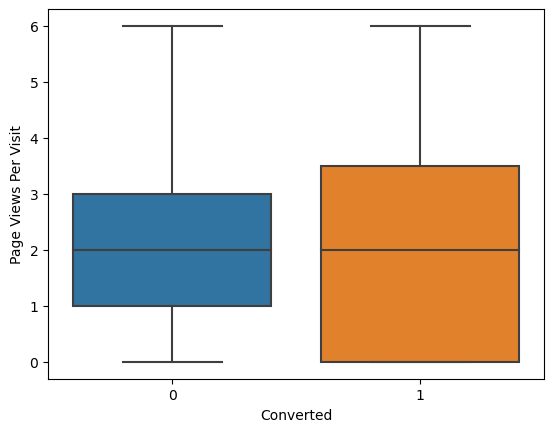

In [36]:
sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

### Creating Dummy Variables

In [37]:
# Replacing thhe only binary column with 1 and 0

df['Do Not Email'].replace('No',0,inplace=True)
df['Do Not Email'].replace('Yes',1,inplace=True)
df_cat=df[["Lead Origin",'Lead Source','Last Activity','Specialization','What is your current occupation','What matters most to you in choosing a course','City','Last Notable Activity']]
# Creating dummies

df_cat=pd.get_dummies(df_cat,drop_first='first')


In [38]:
df_cat.shape

(9074, 86)

In [39]:
df=pd.concat([df,df_cat],axis=1)


In [40]:
df.drop(["Lead Origin",'Lead Source','Last Activity','Specialization','What is your current occupation','What matters most to you in choosing a course','City','Last Notable Activity'],axis=1,inplace=True)

## Train - Test Split

In [41]:
y=df['Converted']
x=df.drop('Converted',axis=1)


In [42]:
# train -test split
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=100)
x_train.shape

(6351, 90)

### Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

x_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scalar.fit_transform(x_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

x_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.284595,-0.160255,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.284595,-0.540048,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-0.671384,-0.888650,-1.265540,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,-0.284595,1.643304,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0.295588,2.017593,0.122613,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


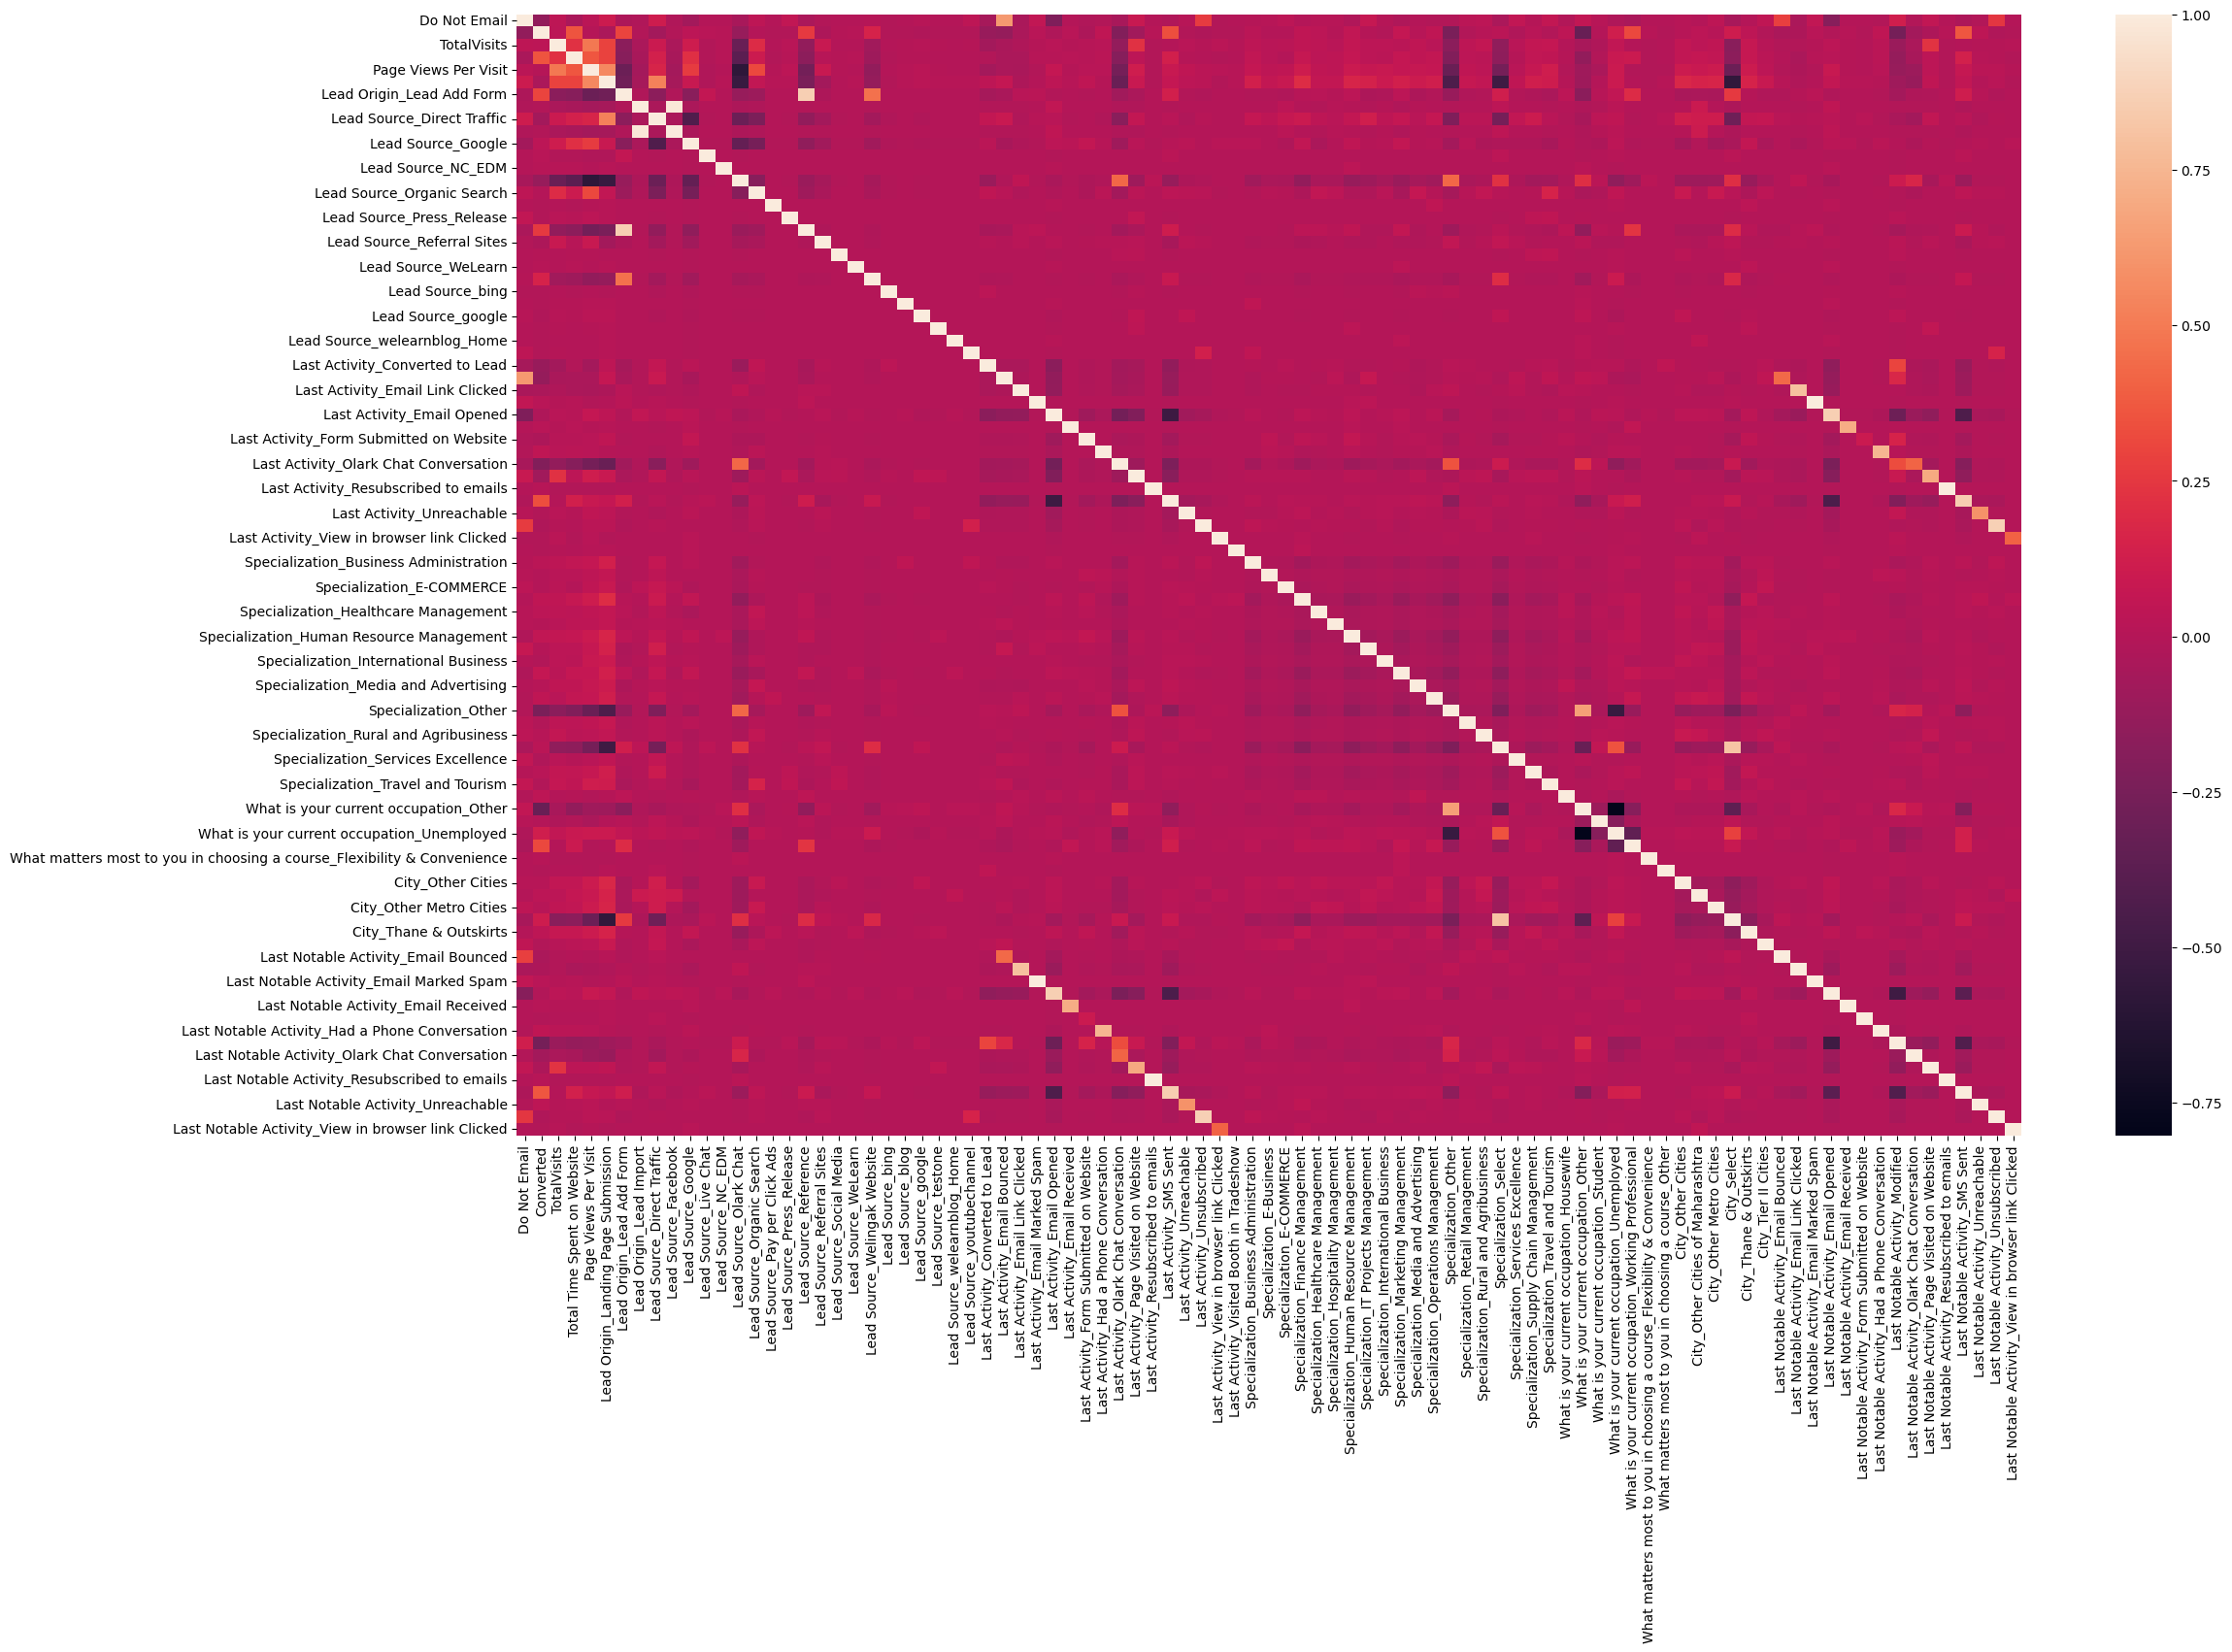

In [44]:
# looking at the correlation table

plt.figure(figsize=(25,15))
sns.heatmap(df.corr())
plt.show()

## Model Building

In [45]:
# Importing the 'LogisticRegression' and creating a LogisticRegression object
logreg = LogisticRegression()
# Importing the 'RFE' and select 15 variables

from sklearn.feature_selection import RFE

rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(x_train, y_train)

In [46]:

# Let's take a look at which features have been selected by RFE
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 48),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 45),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 55),
 ('Lead Source_Direct Traffic', False, 21),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Live Chat', False, 38),
 ('Lead Source_NC_EDM', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Pay per Click Ads', False, 41),
 ('Lead Source_Press_Release', False, 60),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Social Media', False, 28),
 ('Lead Source_WeLearn', False, 75),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 66),
 ('Lead Source_blog', False, 40),
 ('Lead Source_google', False, 35),
 ('Lead Source_testone', False, 39),
 ('Lead Source_wel

In [47]:
cols=x_train.columns[rfe.support_]

In [48]:
x_train_rfe=x_train[cols]
import statsmodels.api as sm

### Model 1

In [49]:
x_train_sm=sm.add_constant(x_train_rfe)
Logr=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
Logr_model=Logr.fit()
Logr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2588.9
Date:                Mon, 13 Nov 2023   Deviance:                       5177.8
Time:                        08:57:21   Pearson chi2:                 6.19e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4041
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8797      0.085    -10.325      0.000      -1.047      -0.713
Do Not Email                                            -1.5885      0.172     -9.211      0.000      -1.926      -1.250
Total Time Spent on Website                              1.1353      0.041     27.966      0.000       1.056       1.215
Lead Origin_Landing Page Submission                     -0.4070      0.093     -4.373      0.000      -0.589      -0.225
Lead Origin_Lead Add Form                                3.3536      0.230     14.560      0.000       2.902       3.805
Lead Source_Olark Chat                                   1.2744      0.122     10.419      0.000       1.035       1.514
Lead Source_Welingak Website                             1.9856      0.751      2.642      0.008       0.513       3.458
Last Activity_Had a Phone Conversation                   1.1960      1.160      1.031      0.303      -1.078       3.470
Last Activity_Olark Chat Conversation                   -1.3438      0.166     -8.112      0.000      -1.669      -1.019
Last Activity_SMS Sent                                   1.3193      0.075     17.624      0.000       1.173       1.466
Specialization_Other                                    -0.4512      0.167     -2.707      0.007      -0.778      -0.125
What is your current occupation_Housewife               22.8487   1.56e+04      0.001      0.999   -3.06e+04    3.06e+04
What is your current occupation_Other                   -1.0836      0.113     -9.601      0.000      -1.305      -0.862
What is your current occupation_Working Professional     2.4942      0.186     13.419      0.000       2.130       2.858
Last Notable Activity_Had a Phone Conversation           2.4509      1.607      1.525      0.127      -0.699       5.601
Last Notable Activity_Unreachable                        2.0730      0.494      4.196      0.000       1.105       3.041
========================================================================================================================
"""

In [50]:
## caluculating Vif (variance inflation factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.50
7,Last Activity_Had a Phone Conversation,3.40
14,Last Notable Activity_Had a Phone Conversation,3.40
10,Specialization_Other,2.45
3,Lead Origin_Landing Page Submission,1.96
12,What is your current occupation_Other,1.93
5,Lead Source_Olark Chat,1.89
4,Lead Origin_Lead Add Form,1.77
8,Last Activity_Olark Chat Conversation,1.32
2,Total Time Spent on Website,1.31


In [51]:
x_train_rfe.drop("What is your current occupation_Housewife",axis=1,inplace=True)

### Model 2 

In [52]:
x_train_sm=sm.add_constant(x_train_rfe)
Logr=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
Logr_model=Logr.fit()
Logr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.5
Date:                Mon, 13 Nov 2023   Deviance:                       5186.9
Time:                        08:57:21   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4033
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8756      0.085    -10.287      0.000      -1.042      -0.709
Do Not Email                                            -1.5919      0.172     -9.231      0.000      -1.930      -1.254
Total Time Spent on Website                              1.1348      0.041     27.986      0.000       1.055       1.214
Lead Origin_Landing Page Submission                     -0.4038      0.093     -4.344      0.000      -0.586      -0.222
Lead Origin_Lead Add Form                                3.3749      0.230     14.674      0.000       2.924       3.826
Lead Source_Olark Chat                                   1.2725      0.122     10.409      0.000       1.033       1.512
Lead Source_Welingak Website                             1.9625      0.751      2.612      0.009       0.490       3.435
Last Activity_Had a Phone Conversation                   1.1915      1.161      1.027      0.305      -1.083       3.466
Last Activity_Olark Chat Conversation                   -1.3469      0.166     -8.131      0.000      -1.672      -1.022
Last Activity_SMS Sent                                   1.3139      0.075     17.563      0.000       1.167       1.460
Specialization_Other                                    -0.4480      0.167     -2.689      0.007      -0.775      -0.121
What is your current occupation_Other                   -1.0879      0.113     -9.644      0.000      -1.309      -0.867
What is your current occupation_Working Professional     2.4888      0.186     13.392      0.000       2.125       2.853
Last Notable Activity_Had a Phone Conversation           2.4496      1.607      1.524      0.127      -0.701       5.600
Last Notable Activity_Unreachable                        2.0684      0.494      4.186      0.000       1.100       3.037
========================================================================================================================
"""

In [53]:
vif = pd.DataFrame()
X = x_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.50
7,Last Activity_Had a Phone Conversation,3.40
13,Last Notable Activity_Had a Phone Conversation,3.40
10,Specialization_Other,2.45
3,Lead Origin_Landing Page Submission,1.96
11,What is your current occupation_Other,1.93
5,Lead Source_Olark Chat,1.89
4,Lead Origin_Lead Add Form,1.77
8,Last Activity_Olark Chat Conversation,1.32
2,Total Time Spent on Website,1.31


In [54]:
x_train_rfe.drop("Last Notable Activity_Had a Phone Conversation",axis=1,inplace=True)

### Model 3 

In [55]:
x_train_sm=sm.add_constant(x_train_rfe)
Logr=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
Logr_model=Logr.fit()
Logr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.6
Date:                Mon, 13 Nov 2023   Deviance:                       5189.3
Time:                        08:57:21   Pearson chi2:                 6.21e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4031
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8779      0.085    -10.316      0.000      -1.045      -0.711
Do Not Email                                            -1.5980      0.172     -9.272      0.000      -1.936      -1.260
Total Time Spent on Website                              1.1340      0.041     27.976      0.000       1.055       1.213
Lead Origin_Landing Page Submission                     -0.4002      0.093     -4.307      0.000      -0.582      -0.218
Lead Origin_Lead Add Form                                3.3771      0.230     14.683      0.000       2.926       3.828
Lead Source_Olark Chat                                   1.2739      0.122     10.420      0.000       1.034       1.514
Lead Source_Welingak Website                             1.9632      0.751      2.613      0.009       0.490       3.436
Last Activity_Had a Phone Conversation                   2.7372      0.750      3.647      0.000       1.266       4.208
Last Activity_Olark Chat Conversation                   -1.3462      0.166     -8.128      0.000      -1.671      -1.022
Last Activity_SMS Sent                                   1.3137      0.075     17.564      0.000       1.167       1.460
Specialization_Other                                    -0.4485      0.167     -2.693      0.007      -0.775      -0.122
What is your current occupation_Other                   -1.0858      0.113     -9.633      0.000      -1.307      -0.865
What is your current occupation_Working Professional     2.4892      0.186     13.395      0.000       2.125       2.853
Last Notable Activity_Unreachable                        2.0674      0.494      4.185      0.000       1.099       3.036
========================================================================================================================
"""

In [56]:
vif = pd.DataFrame()
X = x_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.50
10,Specialization_Other,2.45
3,Lead Origin_Landing Page Submission,1.96
11,What is your current occupation_Other,1.93
5,Lead Source_Olark Chat,1.89
4,Lead Origin_Lead Add Form,1.77
8,Last Activity_Olark Chat Conversation,1.32
2,Total Time Spent on Website,1.31
6,Lead Source_Welingak Website,1.31
9,Last Activity_SMS Sent,1.11


As we can see that , VIF for all Features is less than 5

In [57]:
# Predicting y_train from the model

y_train_predicted=Logr_model.predict(x_train_sm)
y_train_predicted.head(10)

3009    0.072717
1012    0.190320
9226    0.668624
4750    0.692800
7987    0.910806
1281    0.745575
2880    0.033460
4971    0.930521
7536    0.861713
1248    0.894966
dtype: float64

In [58]:
y_train_pred_model = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_predicted})
y_train_pred_model['Prospect ID'] = y_train.index
y_train_pred_model.head()

,Converted,Converted_prob,Prospect ID
3009,0,0.072717,3009
1012,0,0.190320,1012
9226,0,0.668624,9226
4750,1,0.692800,4750
7987,1,0.910806,7987


In [59]:
# Taking a random cutoff point as 0.5

y_train_pred_model['Predicted']=y_train_pred_model.Converted_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_model

,Converted,Converted_prob,Prospect ID,Predicted
3009,0,0.072717,3009,0
1012,0,0.190320,1012,0
9226,0,0.668624,9226,1
4750,1,0.692800,4750,1
7987,1,0.910806,7987,1
...,...,...,...,...
367,0,0.149717,367,0
82,1,0.867318,82,1
8199,0,0.942951,8199,1
7077,0,0.209018,7077,0


In [60]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_model.Converted, y_train_pred_model.Predicted )
print(confusion)

[[3466  439]
 [ 746 1700]]


In [61]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_model.Converted, y_train_pred_model.Predicted))

Accuracy : 0.8134152102031176


In [62]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [63]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6950122649223222


In [64]:
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8875800256081946


## ROC Curve

In [65]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


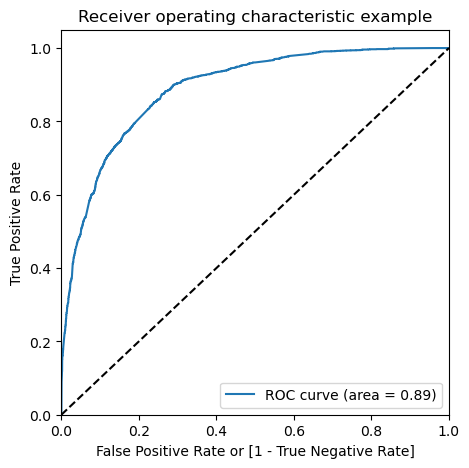

In [66]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_model.Converted, y_train_pred_model.Converted_prob, drop_intermediate = False )

draw_roc(y_train_pred_model.Converted, y_train_pred_model.Converted_prob)


ROC curve =0.89, it means the overall True positive rate is high. After trying out number of combinations from 0.0 to 0.9 it looks like a cut-off point of 0.35 is ideal for this business case.


In [67]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_model[i]= y_train_pred_model.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_model.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.072717,3009,0,1,0,0,0,0,0,0,0,0,0
1012,0,0.190320,1012,0,1,1,0,0,0,0,0,0,0,0
9226,0,0.668624,9226,1,1,1,1,1,1,1,1,0,0,0
4750,1,0.692800,4750,1,1,1,1,1,1,1,1,0,0,0
7987,1,0.910806,7987,1,1,1,1,1,1,1,1,1,1,1


In [68]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_model.Converted, y_train_pred_model[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.595182  0.985282  0.350832
0.2   0.2  0.766179  0.917007  0.671703
0.3   0.3  0.791214  0.874898  0.738796
0.4   0.4  0.810109  0.763696  0.839181
0.5   0.5  0.813415  0.695012  0.887580
0.6   0.6  0.803181  0.630417  0.911396
0.7   0.7  0.780507  0.516762  0.945711
0.8   0.8  0.759093  0.424366  0.968758
0.9   0.9  0.711227  0.270237  0.987452


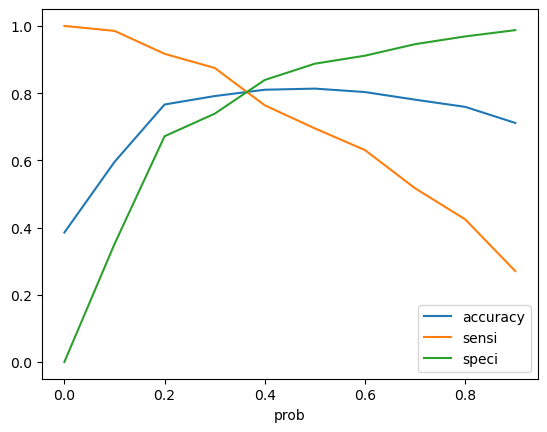

In [69]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


Accuracy, Sensitivity and Specificity all converge into one point 0.35

In [70]:
y_train_pred_model['final_predicted'] = y_train_pred_model.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_model.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,0,0.072717,3009,0,1,0,0,0,0,0,0,0,0,0,0
1012,0,0.190320,1012,0,1,1,0,0,0,0,0,0,0,0,0
9226,0,0.668624,9226,1,1,1,1,1,1,1,1,0,0,0,1
4750,1,0.692800,4750,1,1,1,1,1,1,1,1,0,0,0,1
7987,1,0.910806,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [71]:
y_train_pred_model['Lead_Score'] = y_train_pred_model.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_model.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
3009,0,0.072717,3009,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,0,0.190320,1012,0,1,1,0,0,0,0,0,0,0,0,0,0
9226,0,0.668624,9226,1,1,1,1,1,1,1,1,0,0,0,1,1
4750,1,0.692800,4750,1,1,1,1,1,1,1,1,0,0,0,1,1
7987,1,0.910806,7987,1,1,1,1,1,1,1,1,1,1,1,1,1


In [72]:
## Model Evalution

print("Accuracy :",metrics.accuracy_score(y_train_pred_model.Converted, y_train_pred_model.final_predicted))

Accuracy : 0.7984569359156038


In [73]:
confusion2 = metrics.confusion_matrix(y_train_pred_model.Converted, y_train_pred_model.final_predicted )
confusion2

array([[3035,  870],
       [ 410, 2036]], dtype=int64)

In [74]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [75]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8323793949304987


In [76]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))


Specificity : 0.7772087067861716


In [77]:

# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))


False Positive rate :  0.22279129321382843


In [78]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7006194081211287


In [79]:
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8809869375907112


## Precision and Recall for Training data

In [80]:
confusion = metrics.confusion_matrix(y_train_pred_model.Converted, y_train_pred_model.Predicted )
confusion

array([[3466,  439],
       [ 746, 1700]], dtype=int64)

In [81]:
# Precision

TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7947639083683965


In [82]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6950122649223222


In [83]:
from sklearn.metrics import precision_recall_curve

y_train_pred_model.Converted, y_train_pred_model.Predicted

(3009    0
 1012    0
 9226    0
 4750    1
 7987    1
        ..
 367     0
 82      1
 8199    0
 7077    0
 5754    0
 Name: Converted, Length: 6351, dtype: int64,
 3009    0
 1012    0
 9226    1
 4750    1
 7987    1
        ..
 367     0
 82      1
 8199    1
 7077    0
 5754    1
 Name: Predicted, Length: 6351, dtype: int64)

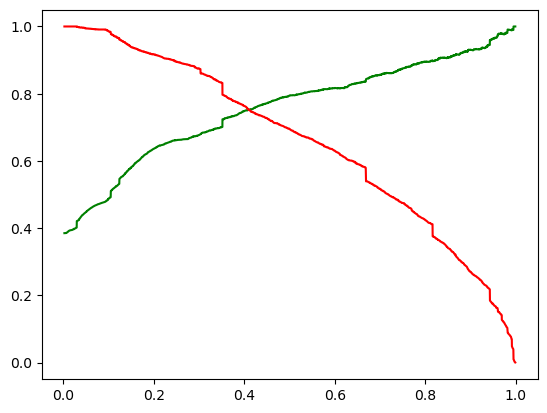

In [84]:
p, r, thresholds = precision_recall_curve(y_train_pred_model.Converted, y_train_pred_model.Converted_prob)
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [85]:

x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scalar.transform(x_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])


In [86]:
x_train_rfe

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Other,What is your current occupation_Other,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
3009,0,-0.160255,1,0,0,0,0,0,0,0,1,0,0
1012,1,-0.540048,1,0,0,0,0,0,0,1,0,1,0
9226,0,-0.888650,0,0,1,0,0,0,1,0,0,0,0
4750,0,1.643304,1,0,0,0,0,0,1,0,1,0,0
7987,0,2.017593,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,0.595662,0,0,0,0,0,0,0,1,1,0,0
82,0,-0.888650,0,0,1,0,0,0,0,0,0,1,0
8199,0,-0.888650,0,1,0,0,0,0,1,0,0,0,0
7077,0,-0.046500,1,0,0,0,0,0,0,0,0,0,0


In [87]:
x_train_rfe.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Other', 'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

## predictions on test data

In [88]:
x_test=x_test[['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Other', 'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable']]
x_test

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Other,What is your current occupation_Other,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
3271,0,-0.600595,0,0,0,0,0,0,0,1,1,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,1,0,0
4216,0,-0.888650,0,1,0,0,0,0,0,0,0,0,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,0,0.632357,1,0,0,0,0,0,0,0,1,0,0
2879,0,0.192017,1,0,0,0,0,0,0,0,0,0,0
6501,0,1.560740,1,0,0,0,0,0,1,0,0,0,0
7155,0,0.056246,1,0,0,0,0,0,0,0,1,0,0


In [89]:
x_test_sm=sm.add_constant(x_test)


In [90]:
y_test_pred=Logr_model.predict(x_test_sm)


In [91]:
y_test_pred

3271    0.043381
1490    0.966147
7936    0.036754
4216    0.816290
3830    0.046068
          ...   
850     0.161534
2879    0.257237
6501    0.858811
7155    0.091109
376     0.069287
Length: 2723, dtype: float64

In [92]:
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
3271,0.043381
1490,0.966147
7936,0.036754
4216,0.816290
3830,0.046068


In [93]:
y_test_df=pd.DataFrame(y_test)

In [94]:
y_test_df['Prospect ID'] = y_test_df.index

In [95]:
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [96]:
y_pred_model = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_model

,Converted,Prospect ID,0
0,0,3271,0.043381
1,1,1490,0.966147
2,0,7936,0.036754
3,1,4216,0.816290
4,0,3830,0.046068
...,...,...,...
2718,0,850,0.161534
2719,0,2879,0.257237
2720,1,6501,0.858811
2721,0,7155,0.091109


In [97]:
y_pred_model= y_pred_model.rename(columns={ 0 :'Converted_probability'})

In [98]:
y_pred_model.head()

,Converted,Prospect ID,Converted_probability
0,0,3271,0.043381
1,1,1490,0.966147
2,0,7936,0.036754
3,1,4216,0.816290
4,0,3830,0.046068


In [99]:
# creating new column predict
y_pred_model['Predicted'] = y_pred_model.Converted_probability.map(lambda x: 1 if x > 0.35 else 0)
y_pred_model.head()

,Converted,Prospect ID,Converted_probability,Predicted
0,0,3271,0.043381,0
1,1,1490,0.966147,1
2,0,7936,0.036754,0
3,1,4216,0.816290,1
4,0,3830,0.046068,0


In [100]:
print("Accuracy :",metrics.accuracy_score(y_pred_model.Converted, y_pred_model.Predicted))

Accuracy : 0.7998531031950055


In [101]:
confusion2 = metrics.confusion_matrix(y_pred_model.Converted, y_pred_model.Predicted )
confusion2

array([[1355,  379],
       [ 166,  823]], dtype=int64)

In [102]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [103]:
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8321536905965622


In [104]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7814302191464821


## Precision Recall for Test Data


In [105]:
print('Precision: ',confusion2[1,1]/(confusion2[1,1]+confusion2[0,1]))

Precision:  0.6846921797004991


In [106]:
print("Recall :",confusion2[1,1]/(confusion2[1,1]+confusion2[1,0]))

Recall : 0.8321536905965622


## Leads Score

In [107]:
y_pred_model['Lead_Score'] = y_pred_model.Converted_probability.map( lambda x: round(x*100))

y_pred_model.head()

,Converted,Prospect ID,Converted_probability,Predicted,Lead_Score
0,0,3271,0.043381,0,4
1,1,1490,0.966147,1,97
2,0,7936,0.036754,0,4
3,1,4216,0.816290,1,82
4,0,3830,0.046068,0,5


In [108]:
Hot_leads=y_pred_model[(y_pred_model['Lead_Score']>85)]
Hot_leads=pd.DataFrame(Hot_leads.index)
Hot_leads.values.reshape(-1)

array([   1,    8,   16,   21,   23,   25,   30,   33,   35,   36,   52,
         54,   57,   70,   75,   87,   99,  106,  114,  115,  117,  119,
        130,  136,  137,  140,  162,  165,  172,  177,  181,  184,  199,
        203,  215,  222,  224,  235,  240,  252,  253,  261,  280,  282,
        287,  292,  327,  411,  412,  418,  421,  439,  441,  452,  465,
        467,  474,  505,  507,  518,  519,  531,  535,  542,  549,  551,
        558,  565,  571,  573,  581,  585,  601,  606,  608,  619,  621,
        641,  651,  655,  658,  661,  662,  667,  670,  675,  678,  679,
        684,  685,  708,  734,  735,  738,  752,  761,  776,  810,  814,
        817,  823,  843,  853,  868,  869,  873,  887,  890,  891,  900,
        911,  916,  926,  938,  939,  947,  953,  970,  972,  983,  997,
       1010, 1018, 1029, 1031, 1048, 1055, 1059, 1068, 1073, 1078, 1095,
       1099, 1106, 1114, 1119, 1130, 1135, 1137, 1149, 1157, 1174, 1180,
       1195, 1203, 1210, 1228, 1229, 1230, 1232, 12

Hot leads are the customers with lead score more than 85, and are potetial customers for X education


In [109]:
Logr_model.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.377075
Last Activity_Had a Phone Conversation                  2.737236
What is your current occupation_Working Professional    2.489167
Last Notable Activity_Unreachable                       2.067432
Lead Source_Welingak Website                            1.963232
Last Activity_SMS Sent                                  1.313687
Lead Source_Olark Chat                                  1.273944
Total Time Spent on Website                             1.134004
Lead Origin_Landing Page Submission                    -0.400195
Specialization_Other                                   -0.448545
const                                                  -0.877930
What is your current occupation_Other                  -1.085831
Last Activity_Olark Chat Conversation                  -1.346210
Do Not Email                                           -1.598011
dtype: float64

## Recommendations:

#### 1.Avoid Certain Customers:

Don't contact customers who said "Do not Email," are labeled as "Others" for occupation, or have a specialization not on our list.

#### 2.Prioritize References:

If someone heard about us from a reference, make sure to follow up with them—they're likely interested.

#### 3.Focus on Working Professionals:

Target working professionals since they are the largest group interested in upgrading their skills.

#### 4.Call Those Who Spoke on the Phone:

People who recently talked on the phone are potential customers, so prioritize reaching out to them.

#### 5.Give Priority to Mumbai:

Pay extra attention to potential customers from Mumbai; they tend to convert at a higher rate.

#### 6.Call Customers with SMS Activity:

Reach out to customers who recently received an SMS; they could be interested.

#### 7.Contact Olark Chat Leads:

If someone engaged through Olark chat, give them a call—they might be likely buyers.